In [28]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

rock       70
elrctro    65
metal      52
hip_hop    23
pop        23
indie      14
folk       14
other      12
classic    10
dtype: int64

In [5]:
pred = pd.read_csv('/Users/Donel/Downloads/forest7.csv')
pred.fillna(pred.mean(), inplace=True)
X = pred.drop(['les', 'Unnamed: 0'], axis = 1)
y = pred.les

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4)

In [6]:
classifire = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators':np.arange(start=10, stop=40, step=1), 
             'max_depth': np.arange(start=1, stop=6, step=1),
             'min_samples_leaf':np.arange(start=1, stop=8, step=1),
             'min_samples_split':np.arange(start=2, stop=10, step=1)}

grid_search = GridSearchCV(classifire, parametrs, cv=4)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])})

In [7]:
grid_search.best_params_

{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 13}

In [8]:
best_clf = grid_search.best_estimator_

best_clf_features_df = pd.DataFrame({"features":list(X),
                                    "importances":best_clf.feature_importances_})

best_clf_features_df.sort_values("importances", ascending=False)

,features,importances
5,Karnofsky,0.103917
14,Grea_perpendicular_T2,0.101558
8,Macdonald,0.083226
13,Larg_diameter_�2,0.074771
17,Postoperative_volume,0.072853
7,Great_perpendicular,0.066027
9,Third_size,0.057917
15,Patological_area,0.057385
12,Difference,0.055910
2,The_affected_side,0.055121


In [34]:
predict = best_clf.predict(X_test)

In [11]:
def key_table(nomenative_col):
    
    values_uniq = pd.unique(nomenative_col)
    
    coord_uniq = pd.Series(label_encoder.fit_transform(values_uniq))
    
    coding = {"gener":values_uniq, "key":coord_uniq}
    
    return pd.DataFrame(data=coding)

key_table(coarse_genre_new )

NameError: name 'coarse_genre_new' is not defined

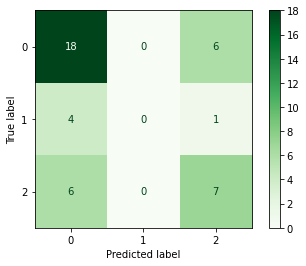

In [15]:
plot_confusion_matrix(best_clf, X_test, y_test, cmap=plt.cm.Greens)

In [14]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        24
           1       0.00      0.00      0.00         5
           2       0.50      0.54      0.52        13

    accuracy                           0.60        42
   macro avg       0.38      0.43      0.40        42
weighted avg       0.52      0.60      0.56        42



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [42]:
best_clf.score(X_test,y_test)

0.5952380952380952

AttributeError: 'DataFrame' object has no attribute 'feature_names'

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

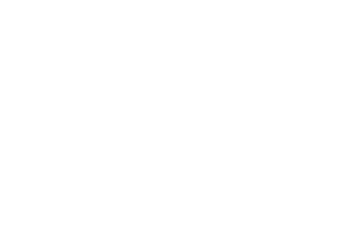

NameError: name 'export_graphviz' is not defined

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.4 , 0.8 , 0.75, 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.5 , 0.75])

array([0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2])